In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

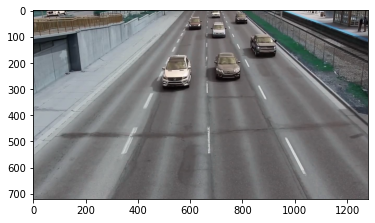

In [23]:
video = cv2.VideoCapture(r"C:\Users\subra\OneDrive\Desktop\Cars Moving On Road.mp4")

ret1, frame1 = video.read()
ret2, frame2 = video.read()

plt.imshow(frame1)

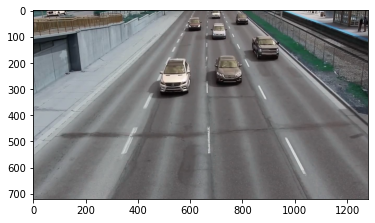

In [24]:
plt.imshow(frame2)

converting BGR to RGB

changing the frames in grayscale

and then displaying it

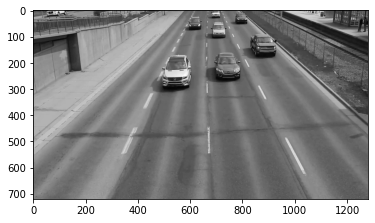

In [9]:
frame1_gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame2_gray = cv2.cvtColor(frame2, cv2.COLOR_BGR2GRAY)

plt.imshow(frame1_gray, cmap='gray')

taken the gaussian blur frames

displaying the blur frame

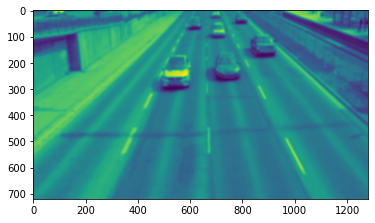

In [10]:
frame1_blur = cv2.GaussianBlur(frame1_gray, (21, 21), 0)
frame2_blur = cv2.GaussianBlur(frame2_gray, (21, 21), 0)

plt.imshow(frame1_blur)

taking the absloute difference between the frames (i.e. frame 1 and frame 2)

now the cars that has moved are in some white color

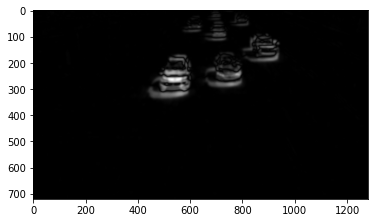

In [15]:
diff = cv2.absdiff(frame1_blur, frame2_blur)

plt.imshow(diff, cmap='gray')

now first we will create a threshold

it will give us totally white color for those cars which are moving or in motion

then we will find some white pixels to detect motion

(720, 1280)


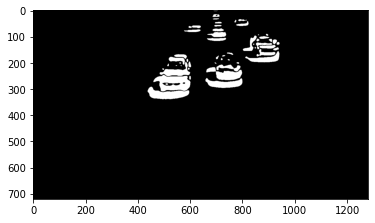

In [16]:
diff, thresh = cv2.threshold(diff, 20, 255, cv2.THRESH_BINARY)

print(thresh.shape)
plt.imshow(thresh, cmap='gray')

calculating the number of white pixels

checking condition if white pixels are more than 5% of total pixels in the frame

if pixels are detected then the object is in motion otherwise not

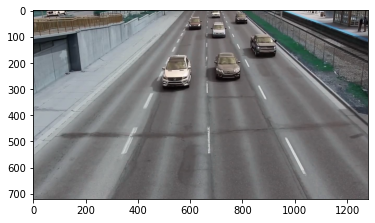

In [17]:
white_pixels = np.sum(thresh) / 255
    
rows, cols = thresh.shape
total_pixels = rows * cols

if white_pixels > 0.05 * total_pixels:
    cv2.putText(frame1, 'Motion Detected', (10, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (255, 0, 0), 2)

plt.imshow(frame1)

now filling the gaps in white pixels using dilate (dilation)

so that we can draw bounding boxes

now these are the counters and can be detected 

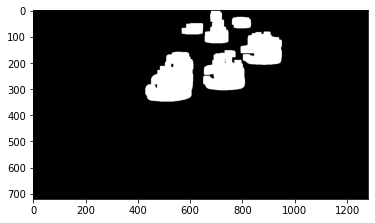

In [19]:
dilate = cv2.dilate(thresh, None, iterations = 9)
plt.imshow(dilate, cmap='gray')

finding the counters

drawing the rectangles or bounding boxes to highlight the objects

displaying the frame

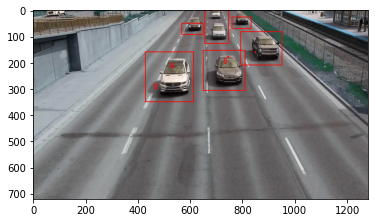

In [20]:
contours,dilate= cv2.findContours(dilate, 1, 2)
display = frame2.copy()

for contour in contours:
  x, y, w, h = cv2.boundingRect(contour)

  cv2.rectangle(display, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(display)